In [1]:
library(tidyverse)
library(vegan)
library(phyloseq)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: permute

Loading required package: lattice

This is vegan 2.6-5



In [2]:
setwd('/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/metadata')

In [3]:
getwd()

[1] "/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/metadata"

In [4]:
colony_data <- read.csv('CBC_ColonyData.csv')

In [5]:
head(colony_data)

,X,Date_InitialTag,Transect,TransectNum,OldTagNuim,NewTagNum,Species,Meter,Meters_90,Direction,⋯,Notes_June_2019,MaxDiameter,Height,Date_DocumentedDisease,Date_DocumentedMortality,Notes_May2022,Sept_2023,Nov_2023,Dec_2023,Jan_2024
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,⋯,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2,6/21/19,CBC30N,1,349,1,SSID,1.5,0.50,right,⋯,,45,24,5/21/22,Diseased,NA,,Not Visited,Not Visited,
2,1,6/21/19,CBC30N,1,334,2,PAST,1.4,0.10,left,⋯,,33,8,Healthy,1/12/24,NA,90%Pale,100% Bleached,100% Bleached,Dead
3,5,6/21/19,CBC30N,1,346,3,SSID,6.3,0.80,right,⋯,,53,30,5/21/22,Diseased,NA,"80^Pale, 80% discoloration","95% Pale, 5% Bleached",80% CLP,
4,25,10/15/19,CBC30N,1,407,4,PSTR,6.5,0.50,right,⋯,,44,39,5/21/22,12/2/22,NA,,NA,NA,
5,23,6/24/19,CBC30N,1,394,5,SSID,4.3,1.20,left,⋯,,65,27,5/21/22,Diseased,NA,,Not Visited,Not Visited,
6,27,10/15/19,CBC30N,1,413,6,PSTR,8.3,1.75,left,⋯,mucus_sample_taken_adjacent_to_punch,35,38,12/2/22,9/25/23,NA,Dead,Not Visited,Not Visited,


In [6]:
# extract year from Date_InitialTag and add it to new column
colony_data$Year_tagged <- format(as.Date(colony_data$Date_InitialTag, format="%m/%d/%y"), "%Y")

In [7]:
colony_data

X,Date_InitialTag,Transect,TransectNum,OldTagNuim,NewTagNum,Species,Meter,Meters_90,Direction,⋯,MaxDiameter,Height,Date_DocumentedDisease,Date_DocumentedMortality,Notes_May2022,Sept_2023,Nov_2023,Dec_2023,Jan_2024,Year_tagged
<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,⋯,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,6/21/19,CBC30N,1,349,1,SSID,1.5,0.50,right,⋯,45,24,5/21/22,Diseased,NA,,Not Visited,Not Visited,,2019
1,6/21/19,CBC30N,1,334,2,PAST,1.4,0.10,left,⋯,33,8,Healthy,1/12/24,NA,90%Pale,100% Bleached,100% Bleached,Dead,2019
5,6/21/19,CBC30N,1,346,3,SSID,6.3,0.80,right,⋯,53,30,5/21/22,Diseased,NA,"80^Pale, 80% discoloration","95% Pale, 5% Bleached",80% CLP,,2019
25,10/15/19,CBC30N,1,407,4,PSTR,6.5,0.50,right,⋯,44,39,5/21/22,12/2/22,NA,,NA,NA,,2019
23,6/24/19,CBC30N,1,394,5,SSID,4.3,1.20,left,⋯,65,27,5/21/22,Diseased,NA,,Not Visited,Not Visited,,2019
27,10/15/19,CBC30N,1,413,6,PSTR,8.3,1.75,left,⋯,35,38,12/2/22,9/25/23,NA,Dead,Not Visited,Not Visited,,2019
20,6/24/19,CBC30N,1,383,7,MCAV,6.0,1.70,right,⋯,32,20,Healthy,Healthy,NA,,Not Visited,Not Visited,,2019
16,6/24/19,CBC30N,1,390,8,MCAV,11.2,0.80,right,⋯,35,30,5/21/22,9/25/23,NA,Dead,NA,NA,,2019
7,6/21/19,CBC30N,1,357,9,SSID,10.2,0.50,right,⋯,38,18,5/21/22,Diseased,NA,,Not Visited,Not Visited,,2019


In [9]:
nrow(colony_data)

[1] 186

In [8]:
# Graph of colonies that died/got diseased across the years
# x-axis year
# y-axis # of colonies
# stacked bar colors: healthy, diseased, dead

In [ ]:
# 1st: create columns for each year 
# pull info from diseaseddate
# if healthy, write healthy in each column
# if date, write "diseased" in corresponding column, and "healthy" in previous years columns
# repeat for mortality 

In [15]:
# get subset of colonies tagged in 2019 (to be able to track since the beginning)
colonies_2019 <- subset(colony_data, colony_data$Year_tagged=="2019")
head(colonies_2019)

,X,Date_InitialTag,Transect,TransectNum,OldTagNuim,NewTagNum,Species,Meter,Meters_90,Direction,⋯,MaxDiameter,Height,Date_DocumentedDisease,Date_DocumentedMortality,Notes_May2022,Sept_2023,Nov_2023,Dec_2023,Jan_2024,Year_tagged
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,⋯,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2,6/21/19,CBC30N,1,349,1,SSID,1.5,0.50,right,⋯,45,24,5/21/22,Diseased,NA,,Not Visited,Not Visited,,2019
2,1,6/21/19,CBC30N,1,334,2,PAST,1.4,0.10,left,⋯,33,8,Healthy,1/12/24,NA,90%Pale,100% Bleached,100% Bleached,Dead,2019
3,5,6/21/19,CBC30N,1,346,3,SSID,6.3,0.80,right,⋯,53,30,5/21/22,Diseased,NA,"80^Pale, 80% discoloration","95% Pale, 5% Bleached",80% CLP,,2019
4,25,10/15/19,CBC30N,1,407,4,PSTR,6.5,0.50,right,⋯,44,39,5/21/22,12/2/22,NA,,NA,NA,,2019
5,23,6/24/19,CBC30N,1,394,5,SSID,4.3,1.20,left,⋯,65,27,5/21/22,Diseased,NA,,Not Visited,Not Visited,,2019
6,27,10/15/19,CBC30N,1,413,6,PSTR,8.3,1.75,left,⋯,35,38,12/2/22,9/25/23,NA,Dead,Not Visited,Not Visited,,2019


In [22]:
# add 2019 column that shows all are healthy
library(dplyr)

colonies_2019 <- colonies_2019 %>%
  mutate("2019" = "Healthy")

In [28]:
head(colonies_2019)

,X,Date_InitialTag,Transect,TransectNum,OldTagNuim,NewTagNum,Species,Meter,Meters_90,Direction,⋯,Height,Date_DocumentedDisease,Date_DocumentedMortality,Notes_May2022,Sept_2023,Nov_2023,Dec_2023,Jan_2024,Year_tagged,2019
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2,6/21/19,CBC30N,1,349,1,SSID,1.5,0.50,right,⋯,24,5/21/22,Diseased,NA,,Not Visited,Not Visited,,2019,Healthy
2,1,6/21/19,CBC30N,1,334,2,PAST,1.4,0.10,left,⋯,8,Healthy,1/12/24,NA,90%Pale,100% Bleached,100% Bleached,Dead,2019,Healthy
3,5,6/21/19,CBC30N,1,346,3,SSID,6.3,0.80,right,⋯,30,5/21/22,Diseased,NA,"80^Pale, 80% discoloration","95% Pale, 5% Bleached",80% CLP,,2019,Healthy
4,25,10/15/19,CBC30N,1,407,4,PSTR,6.5,0.50,right,⋯,39,5/21/22,12/2/22,NA,,NA,NA,,2019,Healthy
5,23,6/24/19,CBC30N,1,394,5,SSID,4.3,1.20,left,⋯,27,5/21/22,Diseased,NA,,Not Visited,Not Visited,,2019,Healthy
6,27,10/15/19,CBC30N,1,413,6,PSTR,8.3,1.75,left,⋯,38,12/2/22,9/25/23,NA,Dead,Not Visited,Not Visited,,2019,Healthy


In [25]:
colonies_2019$Date_DocumentedDisease

[1] "5/21/22" "Healthy" "5/21/22" "5/21/22" "5/21/22" "12/2/22" "Healthy"
  [8] "5/21/22" "5/21/22" "12/2/22" "5/21/22" "Healthy" "Healthy" "5/21/22"
 [15] "5/21/22" "5/21/22" "5/21/22" "Healthy" "5/21/22" "12/2/22" "Healthy"
 [22] "Unknown" "Unknown" "Unknown" "Unknown" "Unknown" "Unknown" "Healthy"
 [29] "Unknown" "Unknown" "Unknown" "5/22/22" "5/22/22" "Healthy" "Healthy"
 [36] "Healthy" "Healthy" "Healthy" NA        "5/22/22" "Healthy" NA       
 [43] NA        "Healthy" "Healthy" "Healthy" "5/22/22" "5/22/22" "Healthy"
 [50] "Healthy" "5/22/22" "5/22/22" "Healthy" "Healthy" "Healthy" "5/22/22"
 [57] "Unknown" "Unknown" "Unknown" "Unknown" "Healthy" NA        "Unknown"
 [64] "Healthy" "Unknown" "Unknown" "Healthy" "Unknown" "Healthy" "5/20/22"
 [71] "Healthy" "Healthy" "Healthy" "Healthy" "Healthy" NA        "Healthy"
 [78] "Unknown" "Unknown" "Healthy" "Healthy" "5/20/22" "Unknown" "5/20/22"
 [85] "5/20/22" "5/20/22" "Healthy" "Healthy" "5/20/22" "5/20/22" "Unknown"
 [92] ""        "Unknown" "5/20/22" "Unknown" "Unknown" "Healthy" "Unknown"
 [99] "12/3/22" "Healthy" "Unknown" "5/20/22" "5/20/22" "Healthy" NA       
[106] NA

In [39]:
colonies_2019$Date_DocumentedMortality

[1] "Diseased" "1/12/24"  "Diseased" "12/2/22"  "Diseased" "9/25/23" 
  [7] "Healthy"  "9/25/23"  "Diseased" "9/25/23"  "Diseased" "Healthy" 
 [13] "Healthy"  "12/2/22"  "12/2/22"  "Diseased" "Diseased" "Healthy" 
 [19] "Diseased" "Healthy"  "Healthy"  "5/21/22"  "5/21/22"  "5/21/22" 
 [25] "5/21/22"  "5/21/22"  "5/21/22"  "Healthy"  "5/21/22"  "5/21/22" 
 [31] "5/21/22"  "Diseased" "Diseased" "Healthy"  "Healthy"  "Healthy" 
 [37] "Healthy"  "Healthy"  "12/2/22"  "Diseased" "Healthy"  "12/4/22" 
 [43] "12/4/22"  "Healthy"  "Healthy"  "9/26/23"  "Diseased" "Diseased"
 [49] "Healthy"  "Healthy"  "12/4/22"  "Diseased" "Healthy"  "Healthy" 
 [55] "Healthy"  "Diseased" "5/22/22"  "5/22/22"  "5/22/22"  "5/22/22" 
 [61] "Healthy"  NA         "5/22/22"  "Healthy"  "5/22/22"  "5/22/22" 
 [67] "Healthy"  "5/20/22"  "Healthy"  "Diseased" "Healthy"  "Healthy" 
 [73] "Healthy"  "Healthy"  "Healthy"  "5/20/22"  "1/11/24"  "5/20/22" 
 [79] "5/20/22"  "Healthy"  "Healthy"  "5/24/23"  "5/20/22"  "12/3/22" 
 [85] "Diseased" "Diseased" "Healthy"  "Healthy"  "12/3/22"  "Diseased"
 [91] "5/20/22"  "5/20/22"  "5/20/22"  "Diseased" "5/20/22"  "5/20/22" 
 [97] "12/3/22"  "5/20/22"  "Diseased" "Healthy"  "5/20/22"  "Diseased"
[103] "Diseased" "Healthy"  NA         NA

In [37]:
# create column for 2022...
colonies_2019 %>%
  mutate(("2022" = 
         case_when(
             grepl("22", Date_DocumentedDisease) ~ "Diseased",
             grepl("Healthy", Date_DocumentedDisease)  ~ "Healthy",
             grepl("Unknown", Date_DocumentedDisease) ~ "Unknown",
             grepl("NA", Date_DocumentedDisease) ~ "NA"
             )
          )
# need to make diff columns for diff months in 2022 instead...also have to incorporate mortality date 
# & why are some entries unknown or na?

In [35]:
library(tidyverse)
data = data.frame(V1 = c("sunny", "sunshine", "dark", "night", "cloud"))
data %>%
    mutate(V2 = case_when(
        grepl("sun", V1) ~ 1,
        grepl("dark|night", V1) ~ 2,
        TRUE ~ 99
        )
    )


V1,V2
<chr>,<dbl>
sunny,1
sunshine,1
dark,2
night,2
cloud,99


In [ ]:
colony_data$2024HealthStatus = 
ifelse(colony_data$Date_DocumentedDisease=="Healthy", NA, 

In [ ]:
# remember to only include colonies initally tagged in 2019 to keep numbers consistent

In [17]:
colony_data2 <- colony_data %>%
  mutate(
    Disease_Date = ifelse(Date_DocumentedDisease == "Healthy", NA, as.Date(Date_DocumentedDisease, format="%m/%d/%y")),
    Date_DocumentedMortality = ifelse(Date_DocumentedMortality == "Healthy" | Date_DocumentedMortality == "Diseased", NA, as.Date(Date_DocumentedMortality, format="%m/%d/%y")),
    HealthStatus = case_when(
      is.na(Date_DocumentedDisease) & is.na(Date_DocumentedMortality) ~ "Healthy",
      !is.na(Date_DocumentedDisease) ~ "Diseased",
      !is.na(Date_DocumentedMortality) ~ "Dead"
    )
  )

In [18]:
colony_data2 

X,Date_InitialTag,Transect,TransectNum,OldTagNuim,NewTagNum,Species,Meter,Meters_90,Direction,⋯,Height,Date_DocumentedDisease,Date_DocumentedMortality,Notes_May2022,Sept_2023,Nov_2023,Dec_2023,Jan_2024,Year_tagged,HealthStatus
<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,⋯,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,6/21/19,CBC30N,1,349,1,SSID,1.5,0.50,right,⋯,24,19133,NA,NA,,Not Visited,Not Visited,,2019,Diseased
1,6/21/19,CBC30N,1,334,2,PAST,1.4,0.10,left,⋯,8,NA,19734,NA,90%Pale,100% Bleached,100% Bleached,Dead,2019,Dead
5,6/21/19,CBC30N,1,346,3,SSID,6.3,0.80,right,⋯,30,19133,NA,NA,"80^Pale, 80% discoloration","95% Pale, 5% Bleached",80% CLP,,2019,Diseased
25,10/15/19,CBC30N,1,407,4,PSTR,6.5,0.50,right,⋯,39,19133,19328,NA,,NA,NA,,2019,Diseased
23,6/24/19,CBC30N,1,394,5,SSID,4.3,1.20,left,⋯,27,19133,NA,NA,,Not Visited,Not Visited,,2019,Diseased
27,10/15/19,CBC30N,1,413,6,PSTR,8.3,1.75,left,⋯,38,19328,19625,NA,Dead,Not Visited,Not Visited,,2019,Diseased
20,6/24/19,CBC30N,1,383,7,MCAV,6.0,1.70,right,⋯,20,NA,NA,NA,,Not Visited,Not Visited,,2019,Healthy
16,6/24/19,CBC30N,1,390,8,MCAV,11.2,0.80,right,⋯,30,19133,19625,NA,Dead,NA,NA,,2019,Diseased
7,6/21/19,CBC30N,1,357,9,SSID,10.2,0.50,right,⋯,18,19133,NA,NA,,Not Visited,Not Visited,,2019,Diseased


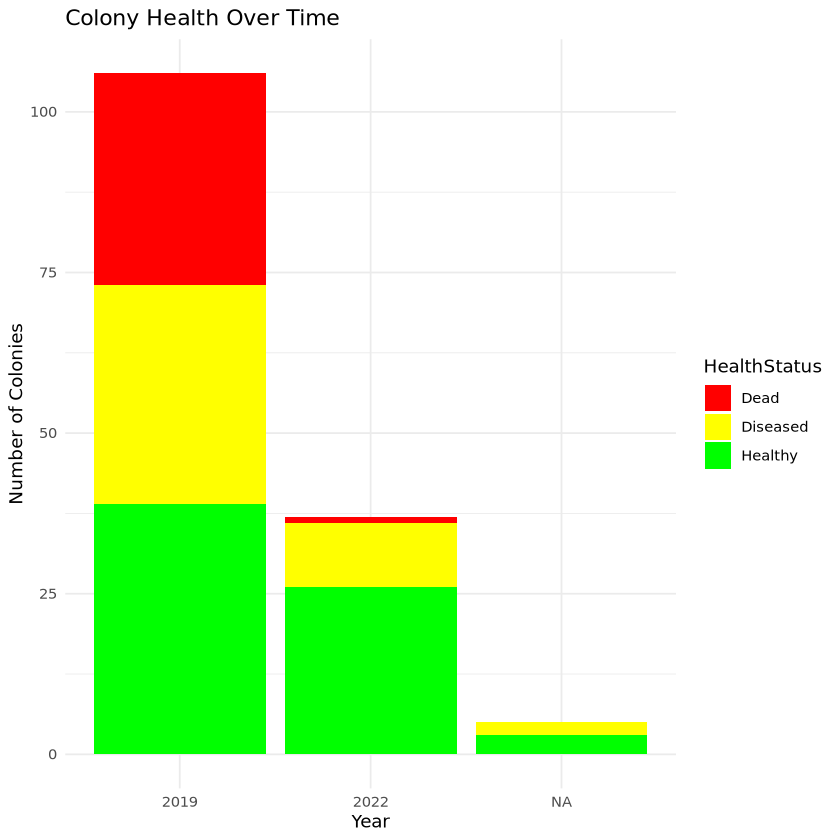

In [29]:
ggplot(colony_data, aes(x = Year, fill = HealthStatus)) +
  geom_bar(position = "stack") +
  labs(title = "Colony Health Over Time",
       x = "Year",
       y = "Number of Colonies") +
  scale_fill_manual(values = c("Healthy" = "green", "Diseased" = "yellow", "Dead" = "red")) +
  theme_minimal()